In [1]:
# Taken from https://www.kaggle.com/code/suvroo/complete-nlp-pipeline#RoPE-(Robust-Positional-Embeddings)

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
df.duplicated().sum()

418

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/saarbu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)
df_post_tags = df.copy()

sw_list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

df['review'] = df['review'].apply(lambda x:x.lower())

In [6]:
# df = df.sample(1000)

In [7]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [9]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
# X_train.shape

In [10]:
# # Applying BoW
# cv = CountVectorizer()
# X_train_bow = cv.fit_transform(X_train['review'])
# X_test_bow = cv.transform(X_test['review'])

# X_train_bow.shape

In [11]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

# rf.fit(X_train_bow,y_train)
# y_pred = rf.predict(X_test_bow)
# accuracy_score(y_test,y_pred)

In [12]:
# X_train_bow

In [13]:
# import optuna
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import RepeatedKFold

# from sklearn.metrics import roc_auc_score

# import xgboost as xgb
# import numpy as np
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split

# from sklearn.model_selection import StratifiedKFold

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000, step=50),
#         "eta": trial.suggest_float("eta", 0.01, 0.3, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 20),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
#         "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "gamma": trial.suggest_float("gamma", 0, 5),
#         "objective": "binary:logistic",
#         "eval_metric": "auc",
#         "verbosity": 0,
#         "tree_method": "hist",
#         "device": "cuda"
#     }

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     aucs = []

#     for train_idx, val_idx in cv.split(X_train_bow, y_train):
#         X_tr, X_val = X_train_bow[train_idx], X_train_bow[val_idx]
#         y_tr, y_val = y_train[train_idx], y_train[val_idx]

#         dtrain = xgb.DMatrix(X_tr, label=y_tr)
#         dvalid = xgb.DMatrix(X_val, label=y_val)

#         model = xgb.train(
#             params=params,
#             dtrain=dtrain,
#             evals=[(dvalid, "eval")],
#             early_stopping_rounds=30,
#             verbose_eval=False
#         )

#         preds = model.predict(dvalid, iteration_range=(0, model.best_iteration))
#         auc = roc_auc_score(y_val, preds)
#         aucs.append(auc)

#     return np.mean(aucs)


# # Run Optuna optimization
# pruner = optuna.pruners.HyperbandPruner()
# study = optuna.create_study(direction="maximize",pruner=pruner)

# # Define baseline trial as a fixed parameter suggestion
# baseline_params = {
#     'n_estimators': 550,
#     'eta': 0.29983309207957676,
#     'max_depth': 19,
#     'subsample': 0.9888438323886279,
#     'colsample_bytree': 0.6889387283870231,
#     'lambda': 1.0481576423947685,
#     'alpha': 0.023164905855125376,
#     'min_child_weight': 10,
#     'gamma': 3.4009242038001064,
# }

# # Add the trial to the queue to run
# study.enqueue_trial(baseline_params)

# study.optimize(objective,timeout=3600)

# # Best hyperparameters found
# best_params = study.best_params
# print(f"\n🔹 Best Hyperparameters:\n{best_params}")

# # Train final model with best hyperparameters on GPU
# best_params["tree_method"] = "gpu_hist"
# best_params["device"] = "cuda"

# dtrain_cv = xgb.DMatrix(X_train_bow, label=y_train)
# final_model = xgb.train(
#     params=best_params,
#     dtrain=dtrain_cv,
# )

# # Evaluate on Hold-Out Validation Set
# dvalid = xgb.DMatrix(X_test_bow, label=y_test)
# test_preds = final_model.predict(dvalid)

# # Convert probabilities to binary labels
# pred_labels = (test_preds > 0.5).astype(int)

# accuracy_score(y_test,pred_labels)


# {'n_estimators': 300, 'eta': 0.29945643753119816, 'max_depth': 20, 'subsample': 0.8783578562355324, 'colsample_bytree': 0.7338100018725511, 'lambda': 0.03509555712821362, 'alpha': 0.0029994420277393804, 'min_child_weight': 10, 'gamma': 2.7368297453515065}

In [14]:
# # Evaluate on Hold-Out Validation Set
# dvalid = xgb.DMatrix(X_test_bow, label=y_test)
# test_preds = final_model.predict(dvalid)


# accuracy_score(y_test,pred_labels)

Using device: cuda

Training with 100 samples...
Epoch 1 | Train Loss: 0.7118 | Val Loss: 0.6018 | Val Accuracy: 0.7100
Epoch 2 | Train Loss: 0.5405 | Val Loss: 0.4960 | Val Accuracy: 0.8195
Epoch 3 | Train Loss: 0.4383 | Val Loss: 0.4343 | Val Accuracy: 0.8369

Training with 250 samples...
Epoch 1 | Train Loss: 0.6227 | Val Loss: 0.4649 | Val Accuracy: 0.8215
Epoch 2 | Train Loss: 0.4071 | Val Loss: 0.3835 | Val Accuracy: 0.8413
Epoch 3 | Train Loss: 0.2533 | Val Loss: 0.3754 | Val Accuracy: 0.8334

Training with 500 samples...
Epoch 1 | Train Loss: 0.5482 | Val Loss: 0.3808 | Val Accuracy: 0.8411
Epoch 2 | Train Loss: 0.2850 | Val Loss: 0.3527 | Val Accuracy: 0.8518
Epoch 3 | Train Loss: 0.2021 | Val Loss: 0.3890 | Val Accuracy: 0.8473

Training with 1000 samples...
Epoch 1 | Train Loss: 0.4364 | Val Loss: 0.3427 | Val Accuracy: 0.8550
Epoch 2 | Train Loss: 0.2231 | Val Loss: 0.3575 | Val Accuracy: 0.8554
Epoch 3 | Train Loss: 0.1492 | Val Loss: 0.3548 | Val Accuracy: 0.8685

Trainin

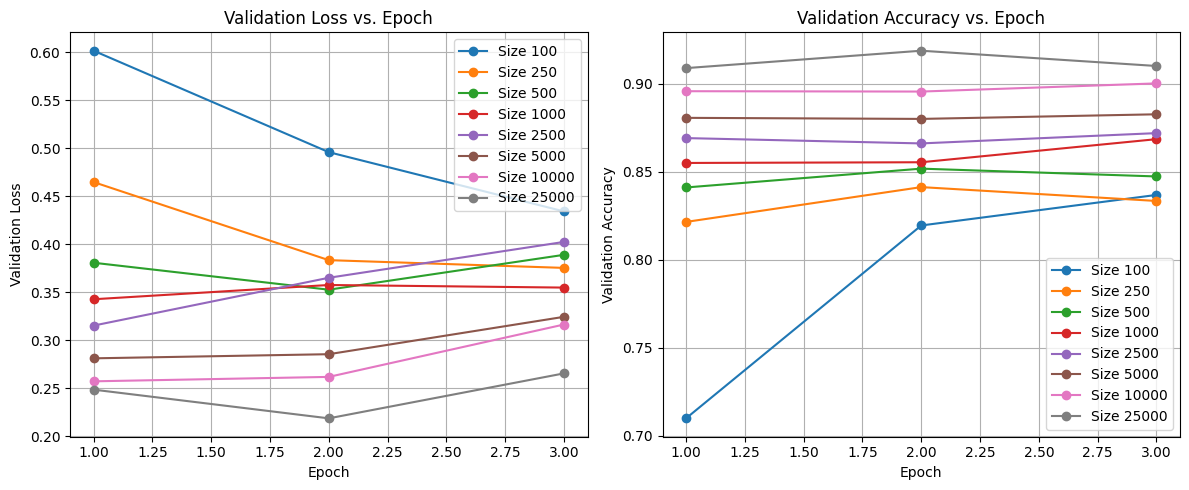

In [15]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import copy
import matplotlib.pyplot as plt

# Define the model name
model_name = "tabularisai/multilingual-sentiment-analysis"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the base model
base_model = AutoModel.from_pretrained(model_name)

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a custom model with a new classification head
class BinarySentimentModel(nn.Module):
    def __init__(self, base_model, num_labels=2):
        super(BinarySentimentModel, self).__init__()
        self.base_model = base_model
        hidden_size = base_model.config.hidden_size
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(hidden_size, num_labels)

    def forward(self, input_ids, attention_mask=None, **kwargs):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

# Define dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=self.max_length)
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Preprocess data
df_post_tags['sentiment'] = df_post_tags['sentiment'].str.lower()
df_post_tags['label'] = df_post_tags['sentiment'].map({'positive': 1, 'negative': 0})
df_post_tags = df_post_tags.dropna(subset=['label'])
df_post_tags['label'] = df_post_tags['label'].astype(int)

# Split off a fixed validation set (10% of 50k = 5k samples)
train_val_df, val_df = train_test_split(df_post_tags, test_size=0.1, random_state=42)
val_texts = val_df['review'].tolist()
val_labels = val_df['label'].tolist()
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer)
val_loader = DataLoader(val_dataset, batch_size=16)

# Define training sizes to test
train_sizes = [100, 250, 500, 1000, 2500, 5000, 10000, 25000]

# Store results (accuracy and loss per epoch for each size)
results = {size: {'val_loss': [], 'val_acc': []} for size in train_sizes}

# Training and evaluation loop for each size
for size in train_sizes:
    print(f"\nTraining with {size} samples...")
    
    # Subsample training data
    train_df_sample = train_val_df.sample(n=min(size, len(train_val_df)), random_state=42)
    train_texts = train_df_sample['review'].tolist()
    train_labels = train_df_sample['label'].tolist()
    
    # Create training dataset and loader
    train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    
    # Reset model
    model = BinarySentimentModel(copy.deepcopy(base_model)).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.CrossEntropyLoss()
    
    # Training loop with validation at each epoch
    num_epochs = 3
    for epoch in range(num_epochs):
        # Training
        model.train()
        total_train_loss = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            logits = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(logits, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        
        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                logits = model(input_ids, attention_mask=attention_mask)
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=-1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        
        avg_val_loss = val_loss / len(val_loader)
        accuracy = correct / total
        
        # Store results
        results[size]['val_loss'].append(avg_val_loss)
        results[size]['val_acc'].append(accuracy)
        
        print(f"Epoch {epoch + 1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Accuracy: {accuracy:.4f}")

# Print final results
print("\nFinal Results:")
for size in train_sizes:
    print(f"Training Size: {size}")
    for epoch in range(num_epochs):
        print(f"  Epoch {epoch + 1} - Val Loss: {results[size]['val_loss'][epoch]:.4f}, Val Accuracy: {results[size]['val_acc'][epoch]:.4f}")

# Optional: Plot results
plt.figure(figsize=(12, 5))

# Plot Validation Loss
plt.subplot(1, 2, 1)
for size in train_sizes:
    plt.plot(range(1, num_epochs + 1), results[size]['val_loss'], marker='o', label=f"Size {size}")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs. Epoch")
plt.legend()
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
for size in train_sizes:
    plt.plot(range(1, num_epochs + 1), results[size]['val_acc'], marker='o', label=f"Size {size}")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import copy
import matplotlib.pyplot as plt

# Define the model name
model_name = "tabularisai/multilingual-sentiment-analysis"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the base model
base_model = AutoModel.from_pretrained(model_name)

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import copy
import matplotlib.pyplot as plt
import numpy as np

# Define the model name
model_name = "tabularisai/multilingual-sentiment-analysis"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the base model
base_model = AutoModel.from_pretrained(model_name)

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Preprocess data
df_post_tags['sentiment'] = df_post_tags['sentiment'].str.lower()
df_post_tags['label'] = df_post_tags['sentiment'].map({'positive': 1, 'negative': 0})
df_post_tags = df_post_tags.dropna(subset=['label'])
df_post_tags['label'] = df_post_tags['label'].astype(int)

# Analyze review lengths in terms of tokens
def get_token_lengths(texts, tokenizer):
    token_lengths = []
    for text in texts:
        tokens = tokenizer(text, truncation=False, return_tensors="pt", add_special_tokens=True)['input_ids'][0]
        token_lengths.append(len(tokens))
    return token_lengths

# Compute token lengths for the 'review' column
review_texts = df_post_tags['review'].tolist()
token_lengths = get_token_lengths(review_texts, tokenizer)

# Calculate max, median, and other stats
max_length = max(token_lengths)
median_length = int(np.median(token_lengths))
total_reviews = len(token_lengths)

print(f"Review Length Analysis (in tokens):")
print(f"  Total Reviews: {total_reviews}")
print(f"  Maximum Token Length: {max_length}")
print(f"  Median Token Length: {median_length}")

# Optional: Additional stats for deeper insight
percentile_90 = int(np.percentile(token_lengths, 90))
print(f"  90th Percentile Token Length: {percentile_90}")

Using device: cuda


Token indices sequence length is longer than the specified maximum sequence length for this model (566 > 512). Running this sequence through the model will result in indexing errors


Using device: cuda
Review Length Analysis (in tokens):
  Total Reviews: 49582
  Maximum Token Length: 3295
  Median Token Length: 238
  90th Percentile Token Length: 623


In [16]:
# df_post_tags['correct'] = df_post_tags['sentiment'].str.lower() == df_post_tags['sentiment_pred'].str.lower()

# # Calculate accuracy
# accuracy = df_post_tags['correct'].mean()

# print(f"Accuracy: {accuracy:.2%}")

In [17]:
# df_post_tags['sentiment'] = predict_sentiment(df_post_tags['review'].tolist())
# sentiment_counts = df_post_tags['sentiment'].value_counts()
# print(sentiment_counts)


In [18]:
df_post_tags

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. The filming tec...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0
